Análisis 'Reporte Base'
 ==========

Comienzo cargando todos los paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime as dt
import datetime
from datetime import timedelta  
import timeboard as tb # turnos 

# para tratar de poner espanol
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
#locale = Locale('es', 'CL')
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

import os
import runpy
from pyexcel_ods import get_data
from matplotlib_venn import venn3
from matplotlib_venn import venn2, venn2_circles
import math

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline


#otro graficador
import seaborn as sns

#stats

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/home/egidio/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# cargo algunos scripts que me suelen servir para análisis

In [3]:
#listo los archivos
scripts = []
for dirname, dirnames, filenames in os.walk('/home/egidio/Dropbox/Compucosas/programas py'):
    for filename in filenames:
        scripts.append(os.path.join(dirname, filename))

scripts

# los cargo
for script in scripts:
    if script[-3:] == '.py':
        exec(open(str(script)).read())


['/home/egidio/Dropbox/Compucosas/programas py/lector_ODF.py',
 '/home/egidio/Dropbox/Compucosas/programas py/como importar',
 '/home/egidio/Dropbox/Compucosas/programas py/descripcion_univariada.py',
 '/home/egidio/Dropbox/Compucosas/programas py/características_operativas_de_test.py',
 '/home/egidio/Dropbox/Compucosas/programas py/percentiles.py',
 '/home/egidio/Dropbox/Compucosas/programas py/tabala_frecuencias.py',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/percentiles.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/lector_ODF.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/descripcion_univariada.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/características_operativas_de_test.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/tabala_frecuencias.cpython-36.pyc',
 '/home/egidio/Dropbox/Compucosas/programas py/__pycache__/funciones_locales.cpython-36.pyc']

# Cargo la BD

In [4]:
BD = pd.read_pickle('./BD/eSAMU.pkl')

In [5]:
BD.columns

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

BD['Motivo del Llamado'].value_counts(normalize=True)*100
BD['Submotivo del Llamado'].value_counts(normalize=True).head(15)*100
dum = pd.crosstab(BD['Submotivo del Llamado'],
            BD.Prioridad, 
            margins=True,
            margins_name = 'Total'
           ).sort_values('Total', ascending=False)
# dum.drop('Total').head(10)
tab = pd.crosstab(BD['Submotivo del Llamado'],
            BD.Prioridad,
            margins=True,
            margins_name = 'All'
           ).sort_values('All', ascending=False)

tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.head(10)
tab.head(10).plot(kind='barh')

In [6]:
for x in BD['Motivo del Llamado'].unique():
    print(x)
    BD.loc[BD['Motivo del Llamado']== x]['Submotivo del Llamado'].value_counts(normalize=True).head(5)*100

Dolor o Problema específico


Dificultad respiratoria leve - moderada (disnea)    25.603865
Dolor de pecho                                      11.235090
Dolor o problemas abdominal                         10.260357
Problemas de Diabetes                                9.251421
Enfermedad terminal, dolor de cancer, agonico.       8.964987
Name: Submotivo del Llamado, dtype: float64

Accidentes y Traumas


Accidente vehicular o transporte. Atropellos      35.767005
Caídas leves                                      26.746624
Accidente múltiples víctimas (cualquier razón)    15.709134
Caídas graves                                      7.078755
Agresiones, ataques, asalto                        6.063910
Name: Submotivo del Llamado, dtype: float64

Traslados


Tr. Especialista              56.449704
Tr. Exámen o Procedimiento    18.703860
Tr. Rescate                    6.937165
Tr. Domicilio                  6.463793
Tr. Cupo                       3.961679
Name: Submotivo del Llamado, dtype: float64

Consciencia


Compromiso de conciencia                           54.820303
Lipotimia recuperada                               14.341679
Enfermedad Psiquiátrica o agitación psicomotora    14.103219
Comportamientos extraños                           12.732073
Focalidad Neurológica. Compromiso neurologico       3.994209
Name: Submotivo del Llamado, dtype: float64

Otro


Fallecido                        59.420105
Otros                            35.496232
Transporte Personal               1.009069
Caso social                       0.983523
Solicitud de consejo de salud     0.830247
Name: Submotivo del Llamado, dtype: float64

Sin patología urgencia


Malestar general adulto mayor            44.333297
Malfunción de sondas o vias              20.545235
Malestar general adulto                  17.302407
Crisis de Panico, Angustia o Nerviosa     7.167198
Heridas simples                           2.187534
Name: Submotivo del Llamado, dtype: float64

Intoxicación


Sobredosis, envenenamientos e intoxicaciones      56.235069
Exposición o fuga materiales, gases peligrosos    31.868132
Estado embriaguez                                 11.896799
Name: Submotivo del Llamado, dtype: float64

Colapso


Convulsiones                                         53.094463
Inconciente, desmayo. Respirando                     26.791531
Colapso respiratorio o circulatorio. PCR. Asfixia    19.075733
OVACE                                                 1.038274
Name: Submotivo del Llamado, dtype: float64

nan


Series([], Name: Submotivo del Llamado, dtype: float64)

S2    21585
S3    22948
S1    19520
S4     9130
S5     1214
Name: Prioridad, dtype: int64

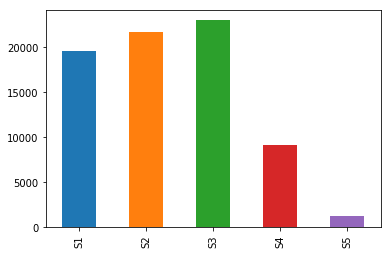

In [7]:
BD.Prioridad.value_counts(sort=False)#.plot('bar')
pd.Categorical(BD.Prioridad).value_counts().plot('bar')

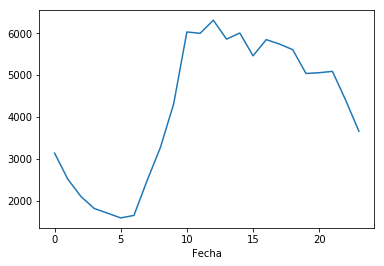

In [8]:
BD.groupby(BD.Fecha.dt.hour).Id.count().plot()


Fecha
2018-01    2299
2018-02    3513
2018-03    3855
2018-04    3542
2018-05    4144
2018-06    4164
2018-07    4011
2018-08    4558
2018-09    4125
2018-10    4163
2018-11    4283
2018-12    4653
2019-01    4532
2019-02    4077
2019-03    4498
2019-04    4152
2019-05    4177
2019-06    3977
2019-07    4605
2019-08    4567
2019-09    4497
2019-10    4849
2019-11    4566
2019-12    4855
Freq: M, Name: Id, dtype: int64

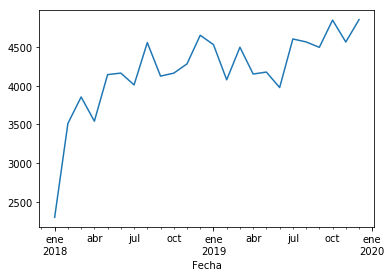

In [9]:
#atenciones mensuales
BD.groupby(BD.Fecha.dt.to_period('M')).Id.count()
BD.groupby(BD.Fecha.dt.to_period('M')).Id.count().plot()

(0, 110)

Text(0.5, 1.0, 'Histograma edad')

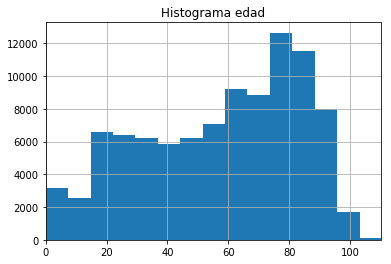

In [10]:
BD.Edad.hist(bins=30)
plt.xlim([0,110])
plt.title('Histograma edad')

In [11]:
BD.columns

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

count                     37590
mean     0 days 00:07:54.635301
std      0 days 00:19:10.988734
min             0 days 00:00:02
25%             0 days 00:00:47
50%             0 days 00:03:03
75%             0 days 00:07:49
max             1 days 02:44:39
Name: Diff_Despacho_Salida, dtype: object

(0, 10)

Text(0.5, 1.0, 'Diff salida  indicada vs real')

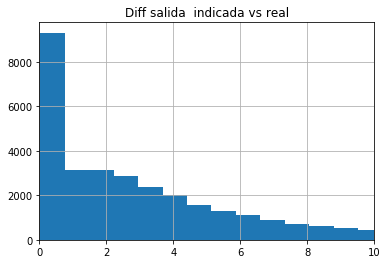

In [12]:
BD.Diff_Despacho_Salida.describe()
(BD.Diff_Despacho_Salida.dt.seconds/60).hist(bins=1000)
plt.xlim([0,10])
plt.title('Diff salida  indicada vs real')

In [13]:
BD['En Regulación'].head()

0                   NaT
1   2019-01-01 02:30:56
2   2019-01-01 02:25:17
3   2019-01-01 02:22:29
4   2019-01-01 02:05:22
Name: En Regulación, dtype: datetime64[ns]

count                     37590
mean     0 days 00:07:54.635301
std      0 days 00:19:10.988734
min             0 days 00:00:02
25%             0 days 00:00:47
50%             0 days 00:03:03
75%             0 days 00:07:49
max             1 days 02:44:39
Name: Diff_Despacho_Salida, dtype: object

(0, 10)

Text(0.5, 1.0, 'Diff salida  indicada vs real')

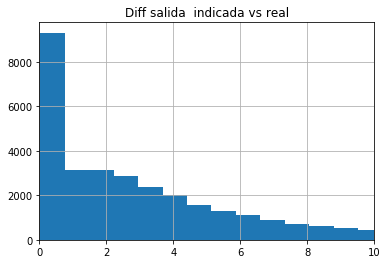

In [14]:
BD.Diff_Despacho_Salida.describe()
(BD.Diff_Despacho_Salida.dt.seconds/60).hist(bins=1000)
plt.xlim([0,10])
plt.title('Diff salida  indicada vs real')

In [15]:
# BD.Doctor.value_counts()
BD.columns
BD[[ 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico']].head(2)

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

,En Regulación,En Despacho,En Curso,Atendida,Completado,Regulado,Usuario que Cierra,Móvil Agregado,Móvil Despachado,Móvil Salida,...,Móvil Camilla Retenida,Móvil Vuelta a Base,Móvil LLegada a Base,Móvil Finalizado,Nombre Vehículo,Tipo Requerido,Tipo Despachado,Km Recorrido,Chofer,Paramédico
0,NaT,2019-01-01 02:51:00,2019-01-01 03:47:53,2019-01-01 04:41:52,2019-01-01 04:42:14,NaT,Ivan Andres Barahona Morales,NaT,2019-01-01 03:47:36,NaT,...,NaT,2019-01-01 04:40:59,NaT,2019-01-01 04:42:14,R31,m1,m1,No informado,NaN,NaN
1,2019-01-01 02:30:56,2019-01-01 02:34:06,2019-01-01 02:37:11,2019-01-01 03:29:34,2019-01-01 03:47:09,NaT,Ivan Andres Barahona Morales,NaT,2019-01-01 02:36:20,2019-01-01 02:44:09,...,NaT,NaT,2019-01-01 03:47:01,2019-01-01 03:47:09,R24,m2,m2,26,NaN,Galvarino Fernando Gonzalez Maya


# Solicitudes al CR

In [16]:
BD.columns

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

In [22]:
# BD.Comuna.value_counts()#.sum()

sector_vina = BD.loc[(BD.Comuna == 'Viña del Mar') | (BD.Comuna == 'Concón') |
             (BD['Nombre Vehículo'].str.contains('R2'))
            ].copy()

sector_quilpue = BD.loc[(BD.Comuna == 'Quilpué') | (BD.Comuna == 'Villa Alemana') |
             (BD['Nombre Vehículo'].str.contains('R3'))
            ].copy()

sector_quillota = BD.loc[(BD.Comuna == 'Quillota') |
             (BD['Nombre Vehículo'].str.contains('R6'))
            ].copy()

sector_quintero = BD.loc[(BD.Comuna == 'Quintero') | (BD.Comuna == 'Puchuncaví') | 
             (BD['Nombre Vehículo'].str.contains('R1'))
            ].copy()

sector_ligua = BD.loc[(BD.Comuna == 'La Ligua') | (BD.Comuna == 'Nogales') |
                      (BD.Comuna == 'Zapallar') |
             (BD['Nombre Vehículo'].str.contains('R8'))
            ].copy()

sector_otros =  BD.loc[(BD.Id.isin(sector_vina.Id)==False) &
                       (BD.Id.isin(sector_quilpue.Id)==False) &
                       (BD.Id.isin(sector_quillota.Id)==False) &
                       (BD.Id.isin(sector_quintero.Id)==False) &
                       (BD.Id.isin(sector_ligua.Id)==False) 
                      ].copy()

sectores = [sector_vina, sector_quilpue, sector_quillota,
            sector_quintero, sector_ligua, sector_otros]

'Viña del Mar'

'Quilpué'

'Quillota'

'Quintero'

'La Ligua'

'Limache'

Text(0, 0.5, 'Cantidad de atenciones')

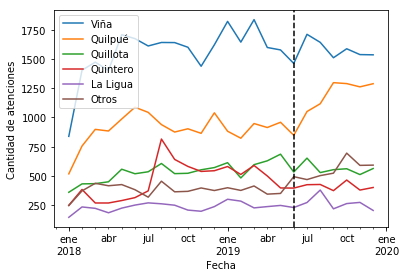

In [56]:
for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    comun
    x.groupby(x.Fecha.dt.to_period('M')).Id.count().plot(label=str(comun))

plt.legend(['Viña', 'Quilpué', 'Quillota','Quintero', 'La Ligua', 'Otros'], loc ='upper left')

plt.ylabel('Cantidad de atenciones')

plt.axvline(593, color='k', linestyle='--')


Solicitudes por día de los distintos sectores

In [146]:
print("Total")

(BD.groupby(BD.Fecha.dt.to_period('M')).Id.count()/30).mean()

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    (x.groupby(x.Fecha.dt.to_period('M')).Id.count()/30).mean()


Total


139.8083333333333

Viña del Mar


52.18888888888889

Quilpué


32.606944444444444

Quillota


17.965277777777775

Quintero


14.816666666666668

La Ligua


8.004166666666665

Limache


14.251388888888885

brecha oportunidad

In [386]:
oportunidad = pd.DataFrame(index=['Igual', 'Menor', 'Mayor', 'Total'])

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    dum = pd.crosstab(x['Tipo Requerido'],
                      x['Tipo Despachado'], dropna=False)
    
    igual = dum.loc['m1']['m1'] + dum.loc['m2']['m2'] + dum.loc['m3']['m3']
    menor = (dum.loc['m2']['m1'] +
             dum.loc['m3']['m2'] + dum.loc['m3']['m1']  )
    mayor = (dum.loc['m1']['m2'] + dum.loc['m1']['m3'] + dum.loc['m2']['m3'])
    
    res = [igual, menor, mayor, dum.sum().sum()]
    oportunidad[comun] = res
    
dum = oportunidad.rename(columns={oportunidad.columns[-1]: 'Otros'})
dum
print('Brecha de oportunidad de recursos menores a los indicados')
(dum.loc['Menor']/ dum.loc['Total'])*100

    

Viña del Mar
Quilpué
Quillota
Quintero
La Ligua
Limache


,Viña del Mar,Quilpué,Quillota,Quintero,La Ligua,Otros
Igual,20066,10607,7828,7718,4166,3089
Menor,982,963,163,238,91,409
Mayor,683,237,355,170,71,46
Total,21786,11816,8350,8129,4330,3547


Brecha de oportunidad de recursos menores a los indicados


Viña del Mar     4.507482
Quilpué          8.149966
Quillota         1.952096
Quintero         2.927789
La Ligua         2.101617
Otros           11.530871
dtype: float64

In [414]:
op_SAMU = (
    (dum.loc['Menor']/ dum.loc['Total'])*100)[
    ['Viña del Mar', 'Quillota', 'Quintero', 'La Ligua']].mean()
op_HQ = (
    (dum.loc['Menor']/ dum.loc['Total'])*100)[['Quilpué']].mean()
print('Brecha oportunidad bases SAMU en %:', op_SAMU)
print('Brecha oportunidad teritorio hosp Quilpué %:', op_HQ)
op_HQ/op_SAMU

Brecha oportunidad bases SAMU en %: 2.8722459254096657
Brecha oportunidad teritorio hosp Quilpué %: 8.14996614759648


2.8374889752638635

In [420]:
BD.columns
pd.DataFrame(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud'])

Index(['Id', 'Fecha', 'Motivo del Llamado', 'Submotivo del Llamado',
       'Prioridad', 'Estado', 'Edad', 'Género', 'Dirección', 'Sector',
       'Comuna', 'Región', 'Intervención', 'Tipo Traslado',
       'Categoría Vehículo', 'Condición Traslado', 'En Regulación',
       'En Despacho', 'En Curso', 'Atendida', 'Completado', 'Regulado',
       'Usuario que Cierra', 'Móvil Agregado', 'Móvil Despachado',
       'Móvil Salida', 'Móvil Llegada Lugar', 'Móvil en Traslado',
       'Móvil Llegada a CA', 'Móvil Recepción Paciente',
       'Móvil Camilla Retenida', 'Móvil Vuelta a Base', 'Móvil LLegada a Base',
       'Móvil Finalizado', 'Nombre Vehículo', 'Tipo Requerido',
       'Tipo Despachado', 'Km Recorrido', 'Chofer', 'Paramédico', 'Enfermero',
       'Doctor', 'Longitud', 'Latitud', 'Diff_recep_Despachado',
       'Diff_Despacho_Salida', 'Diff_salida_enellugar', 'Diff_z6_1',
       'Diff_z6_2', 'Diff_z6_3'],
      dtype='object')

,0
0,Id
1,Fecha
2,Motivo del Llamado
3,Submotivo del Llamado
4,Prioridad
5,Estado
6,Edad
7,Género
8,Dirección
9,Sector


salidas por día según sector

In [383]:
print("Total")
dum = BD.loc[(BD['Nombre Vehículo'].isna() == False) &
                 (BD.Fecha > pd.Timestamp('2019-01-01'))
            ]
total = dum.groupby(dum.Fecha.dt.to_period('D')).Id.count().mean()
total

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    dum  = x.loc[(x['Nombre Vehículo'].isna() == False) &
                 (x.Fecha > pd.Timestamp('2019-01-01'))
    ]
    valor = dum.groupby(dum.Fecha.dt.to_period('D')).Id.count().mean()
    print(round(valor, 4), '(', round(valor/total*100, 4), ')%')

Total


82.0054794520548

Viña del Mar
29.0493 ( 35.4236 )%
Quilpué
20.2082 ( 24.6425 )%
Quillota
12.4877 ( 15.2278 )%
Quintero
11.4575 ( 13.9717 )%
La Ligua
6.1589 ( 7.5104 )%
Limache
4.6072 ( 5.6182 )%


In [320]:
((BD.groupby(BD.Fecha.dt.hour).Id.count())[list(range(8,20,1))]/(24*60))#.mean()
((BD.groupby(BD.Fecha.dt.hour).Id.count())[list(range(0,7,1))+list(range(20,24,1))]/(24*60))#.mean()

Fecha
8     2.271528
9     2.993056
10    4.186806
11    4.164583
12    4.381250
13    4.068056
14    4.169444
15    3.791667
16    4.059722
17    3.986111
18    3.893056
19    3.498611
Name: Id, dtype: float64

Fecha
0     2.178472
1     1.747222
2     1.456944
3     1.259722
4     1.182639
5     1.103472
6     1.145139
20    3.511111
21    3.533333
22    3.055556
23    2.540972
Name: Id, dtype: float64

In [367]:
BD.groupby(BD.Fecha.dt.to_period('H')).Id.count()


# BD.groupby(BD.Fecha.dt.to_period('H')).Id.count().mean()
# (BD.groupby(BD.Fecha.dt.hour).Id.count())/(24*60)

# BD.groupby(BD.Fecha.dt.to_period('H')).Id.count()[list(range(8,20,1))].sum()
# BD.groupby(BD.Fecha.dt.to_period('H')).Id.count()[list(range(0,7,1))+list(range(20,24,1))].sum()

Fecha
2018-01-15 08:00     3
2018-01-15 09:00     8
2018-01-15 10:00     5
2018-01-15 11:00     7
2018-01-15 12:00     9
2018-01-15 13:00     8
2018-01-15 14:00     5
2018-01-15 15:00    14
2018-01-15 16:00     6
2018-01-15 17:00    10
2018-01-15 18:00     6
2018-01-15 19:00    10
2018-01-15 20:00     5
2018-01-15 21:00     3
2018-01-15 22:00     8
2018-01-15 23:00     3
2018-01-16 00:00     2
2018-01-16 01:00     7
2018-01-16 02:00     2
2018-01-16 03:00     3
2018-01-16 04:00     3
2018-01-16 05:00     1
2018-01-16 07:00     5
2018-01-16 08:00     1
2018-01-16 09:00     7
2018-01-16 10:00     7
2018-01-16 11:00     5
2018-01-16 12:00     4
2018-01-16 13:00     3
2018-01-16 14:00     5
                    ..
2019-12-30 18:00    12
2019-12-30 19:00    10
2019-12-30 20:00    10
2019-12-30 21:00     6
2019-12-30 22:00     5
2019-12-30 23:00     7
2019-12-31 00:00     8
2019-12-31 01:00     3
2019-12-31 02:00     5
2019-12-31 03:00     6
2019-12-31 04:00     3
2019-12-31 05:00     1
2019-

In [218]:
dum  = BD.loc[(BD['Nombre Vehículo'].isna() == False)]

print('Salidas diarias promedio')
(dum.groupby(dum.Fecha.dt.to_period('M')).Id.count()/30).mean()

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    dum  = x.loc[(x['Nombre Vehículo'].isna() == False) &
                 (x.Fecha > pd.Timestamp('2019-01-01'))
    ]
    (dum.groupby(dum.Fecha.dt.to_period('M')).Id.count()/30).mean()

Salidas diarias promedio


68.0486111111111

Viña del Mar


29.45277777777778

Quilpué


20.48888888888889

Quillota


12.661111111111111

Quintero


11.616666666666669

La Ligua


6.244444444444444

Limache


4.594444444444444

In [356]:
# no estoy seguro de esto.....

for x in sectores:
    comun = x.Comuna.value_counts().index[0]
    print(comun)
    dum  = x.loc[(x['Nombre Vehículo'].isna() == False) &
                 (x.Fecha > pd.Timestamp('2019-01-01'))
    ]
    t_dia = (
        (dum.groupby(dum.Fecha.dt.hour).Id.count())[
            list(range(8,20,1))
        ]/(12*60))
    
    t_noche = (
        (dum.groupby(dum.Fecha.dt.hour).Id.count())[
            list(range(0,7,1))+list(range(20,24,1))
        ]/(12*60))
    x.groupby(x.Fecha.dt.to_period('H')).Id.count().mean()
    print('salidas día', t_dia.sum())
    print('salidas noche', t_noche.sum())
    print('')
    

Viña del Mar


2.7568598679383713

salidas día 9.425
salidas noche 4.902777777777778

Quilpué


2.0608321629213484

salidas día 6.290277777777779
salidas noche 3.6930555555555555

Quillota


1.567118972619336

salidas día 3.9347222222222227
salidas noche 2.2708333333333335

Quintero


1.5741478530323152

salidas día 3.6944444444444446
salidas noche 1.9930555555555556

La Ligua


1.347124824684432

salidas día 2.0694444444444446
salidas noche 0.9958333333333332

Limache


1.4992694330800702

salidas día 1.4527777777777777
salidas noche 0.7875

